In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split

Link to the dataset: https://www.kaggle.com/datasets/nikhil1e9/loan-default

In [4]:
df = pd.read_csv("loan_default.csv")

In [5]:
print("--- Data Info ---")
df.info()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  objec

In [6]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


==> no need to handle missing values

In [7]:
print("\n--- Numerical Summary ---")
print(df.describe())


--- Numerical Summary ---
                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000

In [8]:
# Analyze the target variable 'Default'
print("\n--- Target Variable (Default) Distribution ---")
print(df['Default'].value_counts(normalize=True))


--- Target Variable (Default) Distribution ---
Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64


In [9]:
# Analyze key categorical columns
print("\n--- Categorical: Education Distribution ---")
print(df['Education'].value_counts())


--- Categorical: Education Distribution ---
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64


This looks pretty unrealisticly balanced... I do not know how this dataset has been sampled, but looks like it is not representative of real-world data. Maybe they used stratified sampling based on the education level.

In [10]:
print("\n--- Categorical: EmploymentType Distribution ---")
print(df['EmploymentType'].value_counts())


--- Categorical: EmploymentType Distribution ---
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64


Same.

In [11]:
print("\n--- Categorical: LoanPurpose Distribution ---")
print(df['LoanPurpose'].value_counts())


--- Categorical: LoanPurpose Distribution ---
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64


Same.

# Visual EDA

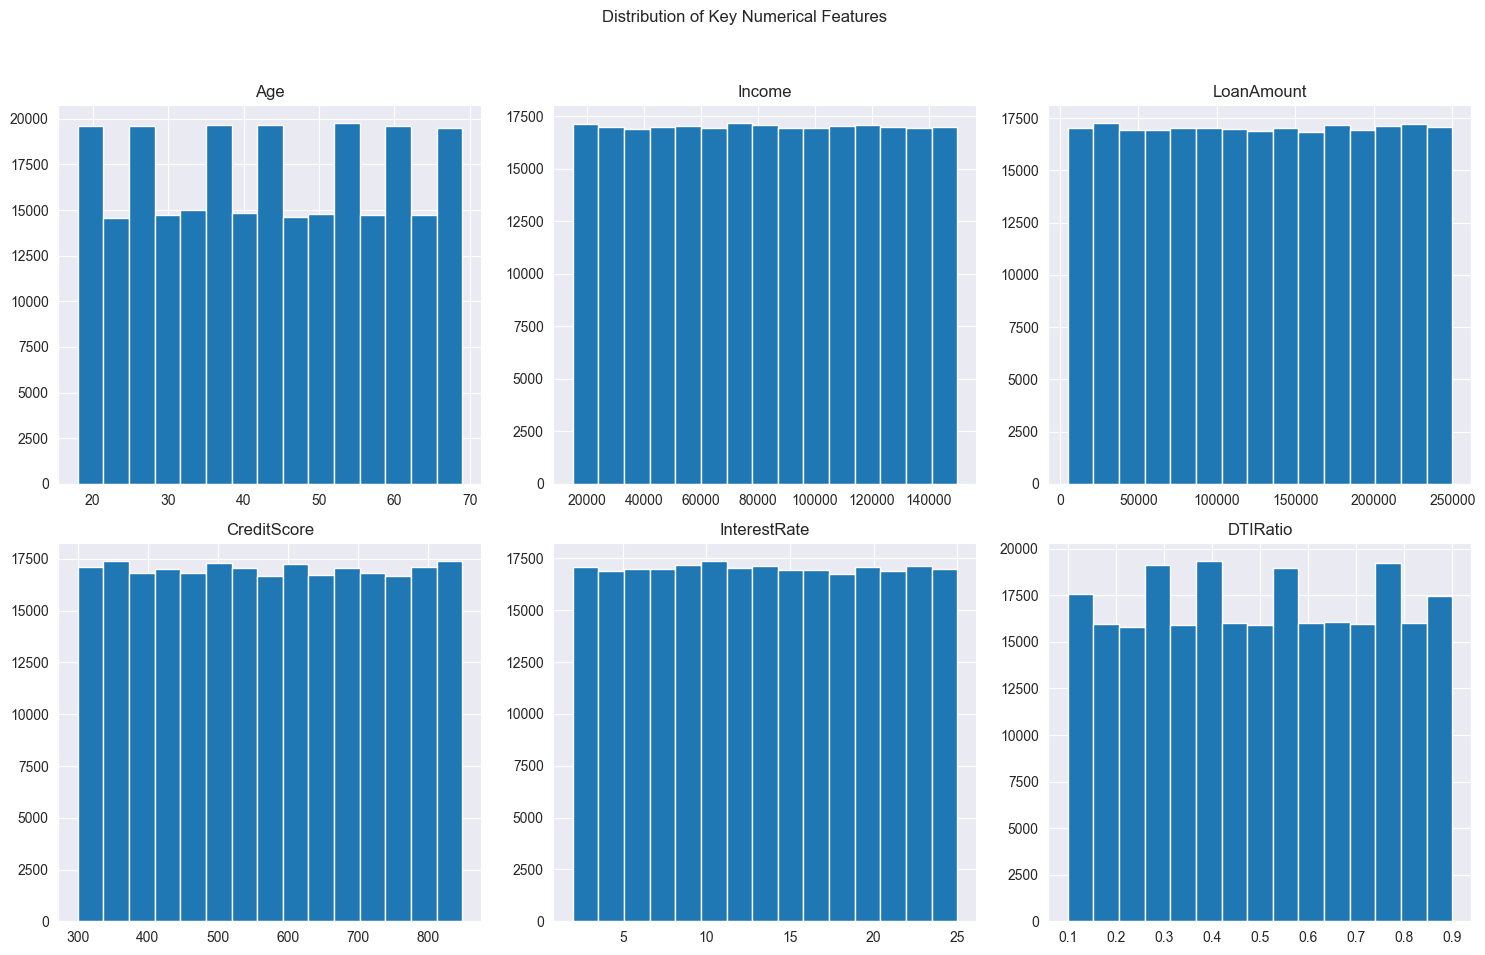

In [13]:
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate', 'DTIRatio']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribution of Key Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('images/numerical_features_distribution.png')